In [26]:
from google.colab import drive
import numpy as np
from scipy import signal
import scipy.signal.windows as win
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle


from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes

##FFT Windowing

Todas las señales digitalizadas dependenten de un numero finito de muestras. Al usar la transformada discreta de fourier, esta nos dara el mismo espectro que su contraparte continua si tenemos el numero suficiente de muestras. En caso contrario obtendremos un espectro que no corresponde con la señal a medir. Este fenomeno se denomina "espectral leakage" para solucionarlo se aplican ventanas de muestreo (funciones).
Por lo general las distintas ventanas que se apliquen proveeran mayor presicion en distintos aspectos (ver cuadro)

In [3]:
def plotEspectro(ch,fs,isdB=False,xlim=[],window="Uniforme", res_espectral=False, fft_solo=False,espectrograma=False):
  if window == "Uniforme":
    ventana = np.ones(len(ch))
    plt.title("Spectrum - Window: Uniform")
  elif window == "Hann":
    ventana = win.hann(len(ch))
    plt.title("Spectrum - Window: Hann")
  elif window == "FlatTop":
    ventana = win.flattop(len(ch))
    plt.title("Spectrum - Window: Flat Top")
  elif window == "Blackman":
    ventana = win.blackman(len(ch))
    plt.title("Spectrum - Window: Blackman")
  else:
    raise ValueError("Ventana erronea. Ingrese ventana valida (Uniforme,Hann,FlatTop,Blackman)")

  k = len(ventana)/np.sum(ventana)  #k para devolver energia que le saca la ventana

  ch = ch*ventana*k
  signalF = np.fft.fft(ch)   # FFT
  signalF = np.abs(signalF)   # Modulo de la fft. Sacamos su valor abs
  signalF = signalF / len(ch)  # Escalamos la amplitud
  signalF = signalF[:int(len(ch)/2)] # Nos quedamos de 0 a fs/2
  signalF = signalF*2   # Escalo para conservar la potencia de la señal original (parseval)
  signaF_aux = signalF
  if fft_solo == True:
    return signalF
  # Pasamos a db. 
  #Dividimos por raiz de 2 por que cada componente es una sin.
  if isdB:
    signalF = 20*np.log10(signalF/np.sqrt(2)) 
  else:
    signalF = signalF/np.sqrt(2)

  fAxis = np.linspace(0,fs/2,len(signalF))

  plt.stem(fAxis,signalF,bottom=-np.inf,use_line_collection=True)
  
  if isdB:
    plt.ylabel("[dBVrms]")
  else:
    plt.ylabel("[Vrms]")
    
  plt.xlabel("[Hz]")
  if len(xlim) == 2:
    plt.xlim(xlim)
  if res_espectral:
    f_Nyq = fs/2 #Freceuncia de Nyquist
    r_espectro = f_Nyq/len(signalF)  #o alternativamente fs/len(sinalgF)
    print("Resolucion espectral {}".format(r_espectro))
  if espectrograma == True:
    return signaF_aux
  

  plt.grid(True)

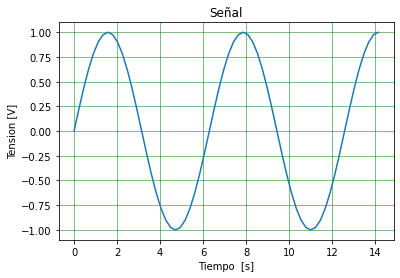

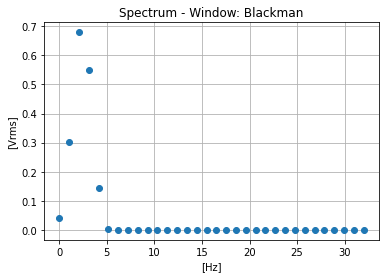

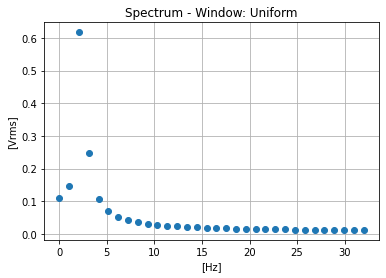

In [4]:
x = np.linspace(0,np.pi*4.5,64,endpoint=True)
y = np.sin(x)
plt.figure()
plt.grid(color='g', linestyle='-', linewidth=0.5)
plt.title("Señal")
plt.plot(x,y)
plt.ylabel("Tension [V]")
plt.xlabel("Tiempo  [s]")
plt.grid(True)

plt.figure()
plotEspectro(y,64,isdB=False,window="Blackman")
plt.figure()
plotEspectro(y,64,isdB=False,window="Uniforme")

Se observa que al haber muestreado un numero no entero de ciclos de la señal. Su espectro diferira al momento de utilizar las distitnas ventanas.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


(-170.0, 0.0)

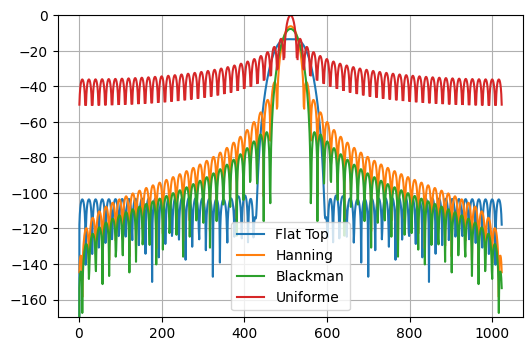

In [5]:
plt.figure(dpi=100)
plt.grid(True)
flatTop = win.flattop(len(x))
hanning = win.hann(len(x))
blackman = win.blackman(len(x))
uniforme = np.ones(len(x))
for ventana in [flatTop,hanning,blackman,uniforme]:
  freqFlatTop = np.fft.fft(ventana,1024)/len(ventana)
  freqFlatTop = 20*np.log10(np.abs(np.fft.fftshift(freqFlatTop)))
  plt.plot(freqFlatTop)
plt.legend(["Flat Top","Hanning","Blackman","Uniforme"])
plt.ylim(-170,0)

En este grafico se puede observar las perdidas espectrales y la resolucion en frecuencia usando las distintas ventanas. A continuacion tenemos una lista de las ventajas y desventajas de las mismas y otras mas. 
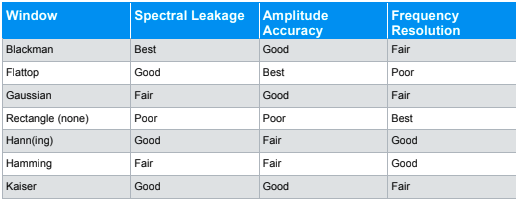

##FFT Length and Windowd Length

La longitud del vector a ser transformado mediante FFT esta definido por el numero de muestras, se utiliza potencias de 2 y un valor muy comun es utilizar 1024. 
El largo determina la resolucion en frecuencia mientras mas grande se obtendra una mayor resolucion con un costo de procesamiento y tiempo de captura mayor. 

Resolucion espectral 1.0
Resolucion espectral 0.5
Resolucion espectral 0.25


<Figure size 432x288 with 0 Axes>

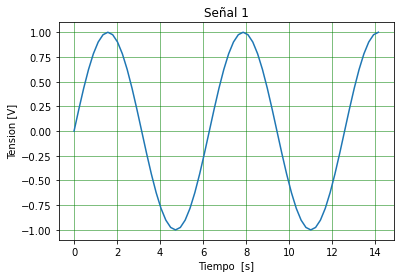

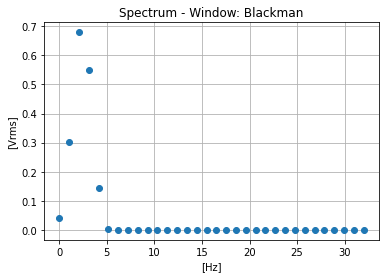

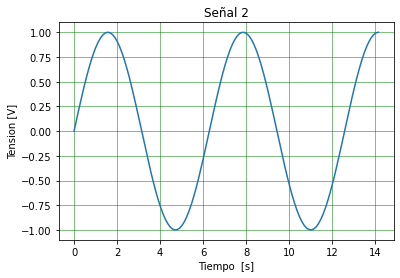

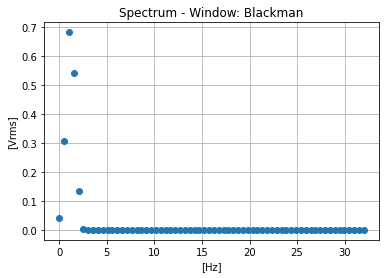

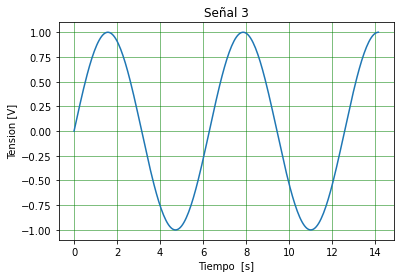

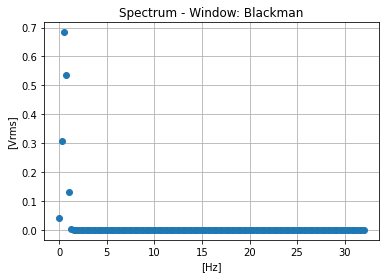

<Figure size 432x288 with 0 Axes>

In [6]:
fs = 64



x1 = np.linspace(0,4.5*np.pi,fs*1,endpoint=True)
y1 = np.sin(x1)
x2 = np.linspace(0,4.5*np.pi,fs*2,endpoint=True)
y2 = np.sin(x2)
x3 = np.linspace(0,4.5*np.pi,fs*4,endpoint=True)
y3 = np.sin(x3)

plt.grid(color='g', linestyle='-', linewidth=0.5)
plt.title("Señal 1")
plt.plot(x1,y1)
plt.ylabel("Tension [V]")
plt.xlabel("Tiempo  [s]")
plt.grid(True)
plt.figure()
plotEspectro(y1,fs,isdB=False,window="Blackman",res_espectral=True)
plt.figure()
plt.grid(color='g', linestyle='-', linewidth=0.5)
plt.title("Señal 2")
plt.plot(x2,y2)
plt.ylabel("Tension [V]")
plt.xlabel("Tiempo  [s]")
plt.grid(True)
plt.figure()
plotEspectro(y2,fs,isdB=False,window="Blackman",res_espectral=True)
plt.figure()
plt.grid(color='g', linestyle='-', linewidth=0.5)
plt.title("Señal 3")
plt.plot(x3,y3)
plt.ylabel("Tension [V]")
plt.xlabel("Tiempo  [s]")
plt.grid(True)
plt.figure()
plotEspectro(y3,fs,isdB=False,window="Blackman",res_espectral=True)
plt.figure()


Se puede observar que al aumentar el numero de puntos capturados. La resolucion espectral disminuyo. En un analizador de FFT mayor longitud de FFT es equivalente a una menor resolucion de ancho de banda (RBW) en un determinado SPAN de frecuencia.

##FFT Update Rate

La resolucion del espectrograma depnede de este parametro como asi tambien en la probalibilidad de intercepccion y overlapping (fenomenos explicados a continuacion)

##FFT Overlapping

Si al momento de tomar dos muestras consecutivas, las FFT no se superponen, la energia del pulso estara distribuida entre las dos FFT mostrando un resultado menor que el real.

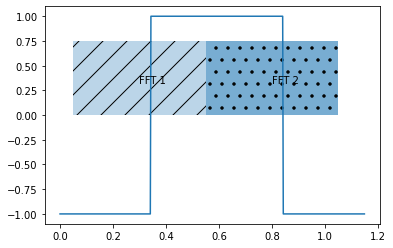

In [7]:
t = np.linspace(0, 1.15, 500, endpoint=False)
y=-signal.square(2 * np.pi * 1 * t+1)

fig, ax = plt.subplots()
ax.plot(t, y)
ax.text(0.35, 0.35, "FFT 1", ha='center', va='center', rotation=0)
ax.text(0.85, 0.35, "FFT 2", ha='center', va='center', rotation=0)

ax.add_patch(Rectangle((0.05, 0), 0.5, 0.75,hatch='/', alpha=0.3))
ax.add_patch(Rectangle((0.55, 0), 0.5, 0.75,hatch='.', alpha=0.6))

 Para solucionar este problema, se utiliza una tecnica llamada "Overlapping" que consiste en reutilizar las muestras entre una FFT y otra.

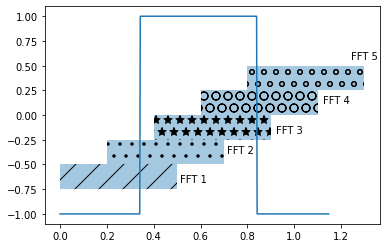

In [8]:
fig, ax = plt.subplots()
ax.plot(t, y)

ax.text(0.57, -0.65, "FFT 1", ha='center', va='center', rotation=0)
ax.text(0.77, -0.35, "FFT 2", ha='center', va='center', rotation=0)
ax.text(0.98, -0.15, "FFT 3", ha='center', va='center', rotation=0)
ax.text(1.18, 0.15, "FFT 4", ha='center', va='center', rotation=0)
ax.text(1.3, 0.6, "FFT 5", ha='center', va='center', rotation=0)

ax.add_patch(Rectangle((0, -0.75), 0.5, 0.25,hatch='/', alpha=0.4))
ax.add_patch(Rectangle((0.2, -0.5), 0.5, 0.25,hatch='.', alpha=0.4))
ax.add_patch(Rectangle((0.4, -0.25), 0.5, 0.25,hatch='*', alpha=0.4))
ax.add_patch(Rectangle((0.6, -0), 0.5, 0.25,hatch='O', alpha=0.4))
ax.add_patch(Rectangle((0.8, 0.25), 0.5, 0.25,hatch='o', alpha=0.4))

Se procede a realizar una desmostracion sobre una señal sinusoidal con ruido, mostrando los distintos resultados de una FFT con overlap del 0%, 50% y 75%

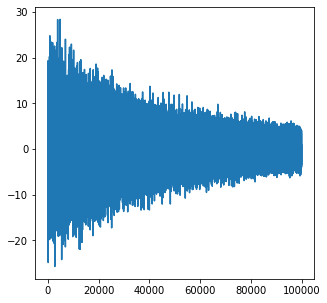

In [37]:
fs = 10e3
N = 1e5
NFFT = 1024
amp = 2 * np.sqrt(2)
noise_power = 0.01 * fs / 2
time = np.arange(N) / float(fs)
mod = 500*np.cos(2*np.pi*0.25*time)
carrier = amp * np.sin(2*np.pi*3e3*time + mod)
noise = np.random.normal(scale=np.sqrt(noise_power), size=time.shape)
noise *= np.exp(-time/5)
x = carrier + noise



plt.figure(figsize=(5,5))
plt.plot(x)
plt.show()

In [12]:
def mi_fft_overlap(sent, Nventana, overlap):
  cantidad_muestras=np.ceil(len(sent)/Nventana) #tomo la cantidad de muestras
  muestra_overlapeada = np.zeros(int( Nventana*cantidad_muestras)) #declaro un vector
  overlap = int(np.round(Nventana*(overlap/100)))
  debug = 0
  for n in range(int(cantidad_muestras)):
    if (n==0):
      muestra_overlapeada[0:Nventana]=sent[0:Nventana]
      if debug:
        print("muestra_overlapeada[{}:{}]=Sent[{}:{}]".format(0,Nventana,0,Nventana))
    else:
      muestra_overlapeada[n*Nventana:(n+1)*Nventana]=sent[overlap*(n):Nventana+overlap*n]
      if debug:
        print("muestra_overlapeada[{}:{}]=Sent[{}:{}]".format(n*Nventana,(n+1)*Nventana,overlap*(n),Nventana+overlap*n))
  return muestra_overlapeada

FFT e espectrograma con overlap 0%

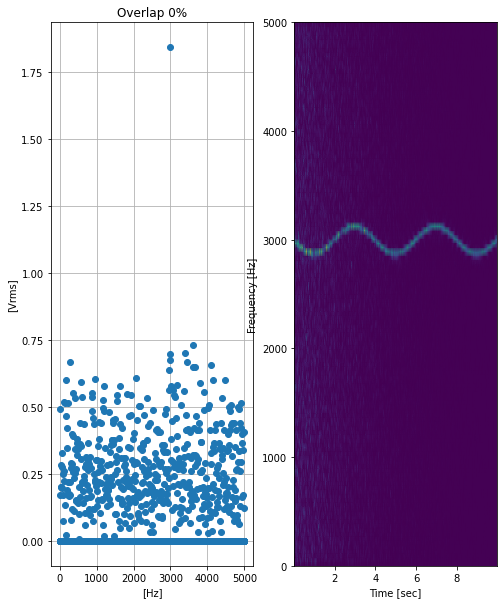

In [29]:
plt.figure(figsize=(8,10))
x_aux=x
plt.subplot(121)
s_ent=mi_fft_overlap(x, 1024, 0)
plotEspectro(s_ent, fs,isdB=False,window="Uniforme")
plt.title('Overlap 0%')
f, t, Sxx = signal.spectrogram(x, fs)
plt.subplot(122)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

FFT e espectrograma con overlap 50%

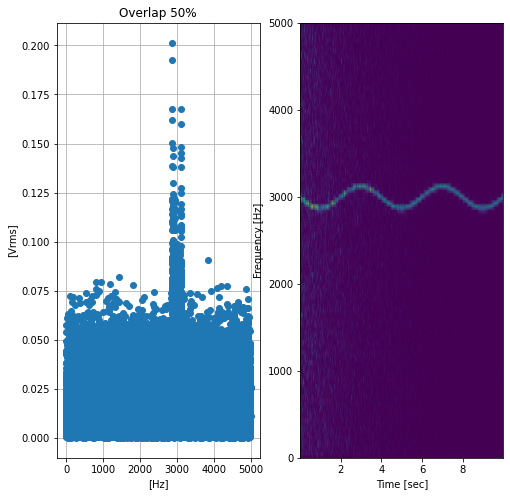

In [30]:
plt.figure(figsize=(8,8))
x=x_aux
plt.subplot(121)
s_ent=mi_fft_overlap(x, 1024, 50)
plotEspectro(s_ent, fs,isdB=False,window="Uniforme")
plt.title('Overlap 50%')
f, t, Sxx = signal.spectrogram(x, fs)
plt.subplot(122)
plt.pcolormesh( t,f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

FFT e espectrograma con overlap 75%

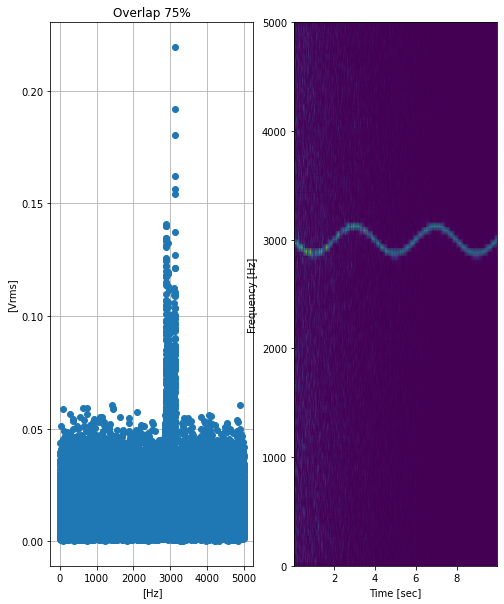

In [31]:
fig=plt.figure(figsize=(8,10))
x=x_aux
plt.subplot(121)
s_ent=mi_fft_overlap(x, 1024, 75)
plotEspectro(s_ent, fs,isdB=False,window="Uniforme")
plt.title('Overlap 75%')
f, t, Sxx = signal.spectrogram(x, fs)
plt.subplot(122)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

Se puede observar que al utilizar un overlapping mayor al 50% la medicion resulta ser mas certera

Como conclusion de los graficos vistos y la simulacion, se puede observar que pulsos cortos pueden atenuados si estan ocurren en el borde pero correctamente medidos si ocurren en el centro de la ventana. Gracias al "Overlapping" este fenomeno se ve es solucionado.

Se puede observar ademas un espectrograma que es una forma de representar la variacion del espectro a lo largo del tiempo. Utilizando esta manera de representacion podemos obtener de manera mas exacta el nivel de energia de una señal en el tiempo. Las lineas del espectrograma son llamadas "frames" o cuadros que representan varias adquisiones de muestras y posterior procesado usando FFT's

##Time Resolution of FFT Results

El resultado de realizar una FFT no es la repsetnacion de un solo punto en el tiempo sino que la representacion esprectal de un cierto periodo de tiempo. Una desventaja de esto es que muchos eventos pueden ocurrir en el mismo lapso de tiempo capturado. Para ello se define el tiempo de exposicion efectivo. En un analizador de tiempo real es que define el tiempo entre dos muestras.

Analiticamente se define:

$$ t_{exposure} = N_{FFT}.\frac{1}{f_s}$$

1.   $f_s$:Frecuencia de muestreo
2.   $N_{FFT}$:Cantidad de muestras tomadas


<Figure size 432x288 with 0 Axes>

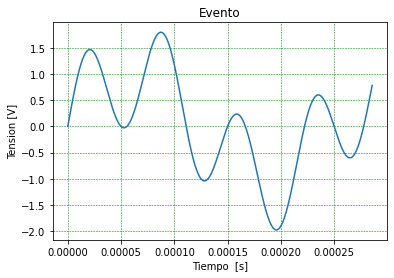

<Figure size 432x288 with 0 Axes>

In [32]:
f1   = 14000    #Frecuencia señal a medir
f2   = 4000
fs  = f1*2       #Frecuencia de muestreo respentando nyquist
n   = 4         #Cantidad de ciclos que quiero que entre mi señal

t =  np.linspace(0,n/f1,fs, endpoint=False)
y=np.sin(2 * np.pi * f1 * t)+np.sin(2 * np.pi * f2 * t)
plt.grid(color='g', linestyle='--', linewidth=0.5)
plt.title("Evento")
plt.plot(t,y)
plt.ylabel("Tension [V]")
plt.xlabel("Tiempo  [s]")
plt.grid(True)
plt.figure()

(0.0, 10000.0)

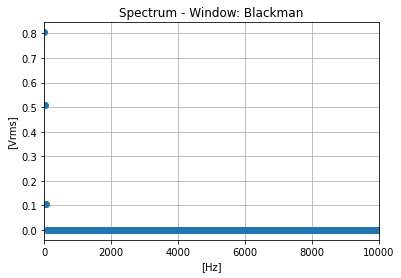

In [33]:
nfft = 1024
plt.figure()
plotEspectro(y[:nfft],fs,isdB=False,window="Blackman")
plt.xlim(0,10e3)

Espectrograma usando 

1.   $N_{FFT} = 1024$
2.   $f_s = 800~KHz$




In [34]:
print('El tiempo de exposicion usando {} muestras con una frecuencia de muestreo de {} Hz es {} segundos'. format (nfft,fs,nfft/fs))

El tiempo de exposicion usando 1024 muestras con una frecuencia de muestreo de 28000 Hz es 0.036571428571428574 segundos


In [ ]:
nfft = 1024*20
plt.figure()
plotEspectro(y[:nfft],fs,isdB=False,window="Blackman")
plt.xlim(0,1e3)

Espectrograma usando 

1.   $N_{FFT} = 20480$
2.   $f_s = 800~KHz$



In [36]:
print('El tiempo de exposicion usando {} muestras con una frecuencia de muestreo de {} Hz es {} segundos'. format (nfft,fs,nfft/fs))

El tiempo de exposicion usando 20480 muestras con una frecuencia de muestreo de 28000 Hz es 0.7314285714285714 segundos


Como conclusión de observo que a mayor tiempo de exposicion mas certera será la medición. 

##Probability of Intercept

Un evento tiene que estar presente por lo menos en un periodo de muestras completo para ser procesado y alcanzar una probabilidad del 100%. El tiempo minimo para alcanzar 100% usando ventanas de largo igual al de la FFT puede ser calculado como:

$t_{100\%poi}=(2-P_{overlap}*\frac{N{FFT}}{f_s})$

Al alcanzar poi=100% se asegura que la energia exhibida sera la verdadera. Si se tiene una probalidad mas grande y se necesita reducirla una tecnica es utilizar ventanas de longitudes mas cortas que la FFT